In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import many
import cancer_data

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from statsmodels.stats.multitest import multipletests

In [17]:
depmap_damaging = cancer_data.load("depmap_damaging")
depmap_hotspot = cancer_data.load("depmap_hotspot")
ccle_exonusage = cancer_data.load("ccle_exonusage")

In [3]:
ensembl_paralogs = pd.read_feather(
    "../data/intermediate/paralog_mutation_splicing_correlations.feather"
)

damaging_pvals = ensembl_paralogs["damaging_pval"].dropna()
hotspot_pvals = ensembl_paralogs["hotspot_pval"].dropna()

ensembl_paralogs["damaging_qval"] = pd.Series(
    multipletests(
        damaging_pvals,
        alpha=0.01,
        method="fdr_bh",
    )[1],
    index=damaging_pvals.index,
)

ensembl_paralogs["hotspot_qval"] = pd.Series(
    multipletests(
        hotspot_pvals,
        alpha=0.01,
        method="fdr_bh",
    )[1],
    index=hotspot_pvals.index,
)

In [4]:
ensembl_paralogs["label"] = (
    ensembl_paralogs["external_gene_name"].fillna("")
    + " • "
    + ensembl_paralogs["hsapiens_paralog_associated_gene_name"].fillna("")
)

In [18]:
ensembl_paralogs.columns

Index(['index', 'ensembl_gene_id', 'external_gene_name',
       'hsapiens_paralog_ensembl_gene',
       'hsapiens_paralog_associated_gene_name', 'entrez_id',
       'paralog_entrez_id', 'hgnc_symbol', 'paralog_hgnc_symbol', 'ccle_gene',
       'ccle_paralog_exons', 'hotspot_pos_size', 'hotspot_neg_size',
       'hotspot_biserial', 'hotspot_pval', 'damaging_pos_size',
       'damaging_neg_size', 'damaging_biserial', 'damaging_pval',
       'damaging_qval', 'hotspot_qval', 'label'],
      dtype='object')

In [50]:
ensembl_paralogs[ensembl_paralogs["damaging_qval"]<1e-10][["label","ccle_paralog_exons"]]

,label,ccle_paralog_exons
20438,KCNQ1 • KCNQ3,KCNQ3_5p_chr8_133198428_133198338_ENSG00000184...
676525,SGK2 • MAST4,MAST4_3p_chr5_66440972_66441207_ENSG0000006902...
1369168,RPL22 • RPL22L1,RPL22L1_5p_chr3_170585990_170585802_ENSG000001...
3093251,KRT3 • KRT76,KRT76_3p_chr12_53165003_53164783_ENSG000001850...


/Users/kevinhu/Library/Caches/pypoetry/virtualenvs/kevinhu-Rgu4vvcg-py3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KRT3', ylabel='KRT76_3p_chr12_53165003_53164783_ENSG00000185069.2'>

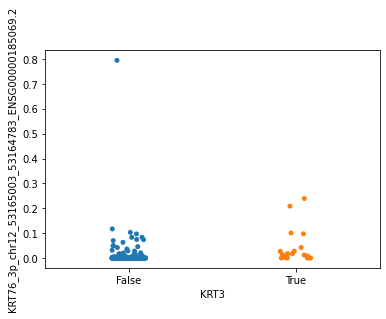

In [53]:
sns.stripplot(
    depmap_damaging["KRT3"],
    ccle_exonusage["KRT76_3p_chr12_53165003_53164783_ENSG00000185069.2"],
)

/Users/kevinhu/Library/Caches/pypoetry/virtualenvs/kevinhu-Rgu4vvcg-py3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GOLGA8R', ylabel='GOLGA8S_5p_chr15_23609490_23609590_ENSG00000261739.2'>

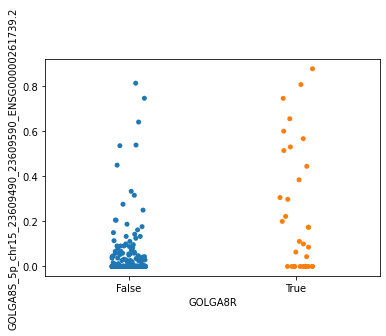

In [41]:
sns.stripplot(
    depmap_hotspot["GOLGA8R"],
    ccle_exonusage["GOLGA8S_5p_chr15_23609490_23609590_ENSG00000261739.2"],
)

/Users/kevinhu/Library/Caches/pypoetry/virtualenvs/kevinhu-Rgu4vvcg-py3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GOLGA8R', ylabel='GOLGA8S_3p_chr15_23609490_23609590_ENSG00000261739.2'>

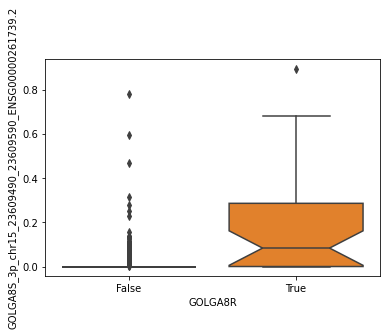

In [38]:
sns.boxplot(
    depmap_hotspot["GOLGA8R"],
    ccle_exonusage["GOLGA8S_3p_chr15_23609490_23609590_ENSG00000261739.2"],
    notch=True
)

/Users/kevinhu/Library/Caches/pypoetry/virtualenvs/kevinhu-Rgu4vvcg-py3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RPL22', ylabel='RPL22L1_5p_chr3_170585990_170585802_ENSG00000163584.13'>

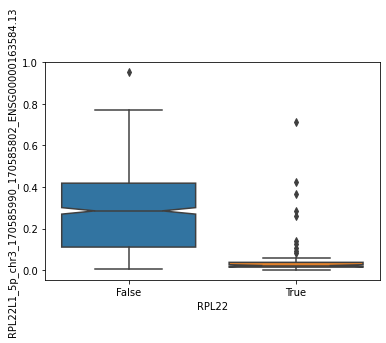

In [36]:
sns.boxplot(
    depmap_hotspot["RPL22"],
    ccle_exonusage["RPL22L1_5p_chr3_170585990_170585802_ENSG00000163584.13"],
    notch=True
)

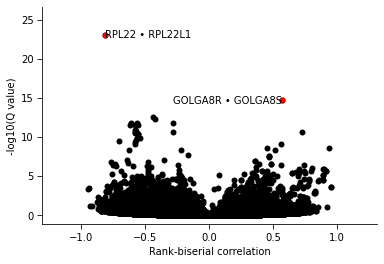

In [57]:
many.visuals.dense_plot(
    ensembl_paralogs["hotspot_biserial"],
    -np.log10(ensembl_paralogs["hotspot_qval"]),
    text_adjust=False,
    labels_mask=ensembl_paralogs["hotspot_qval"] < 1e-14,
    labels=ensembl_paralogs["label"],
    colormap=None,
)

plt.xlabel("Rank-biserial correlation")
plt.ylabel("-log10(Q value)")

plt.savefig(
    "../plots/hotspot_splicing_associations.pdf", dpi=512, bbox_inches="tight", transparent=True
)

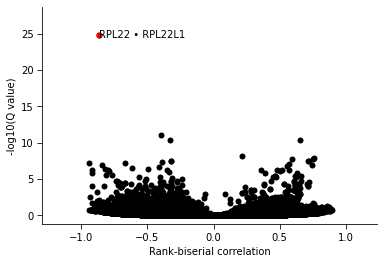

In [58]:
many.visuals.dense_plot(
    ensembl_paralogs["damaging_biserial"],
    -np.log10(ensembl_paralogs["damaging_qval"]),
    text_adjust=False,
    labels_mask=ensembl_paralogs["damaging_qval"] < 1e-15,
    labels=ensembl_paralogs["label"],
    colormap=None,
)

plt.xlabel("Rank-biserial correlation")
plt.ylabel("-log10(Q value)")

plt.savefig(
    "../plots/damaging_splicing_associations.pdf", dpi=512, bbox_inches="tight", transparent=True
)